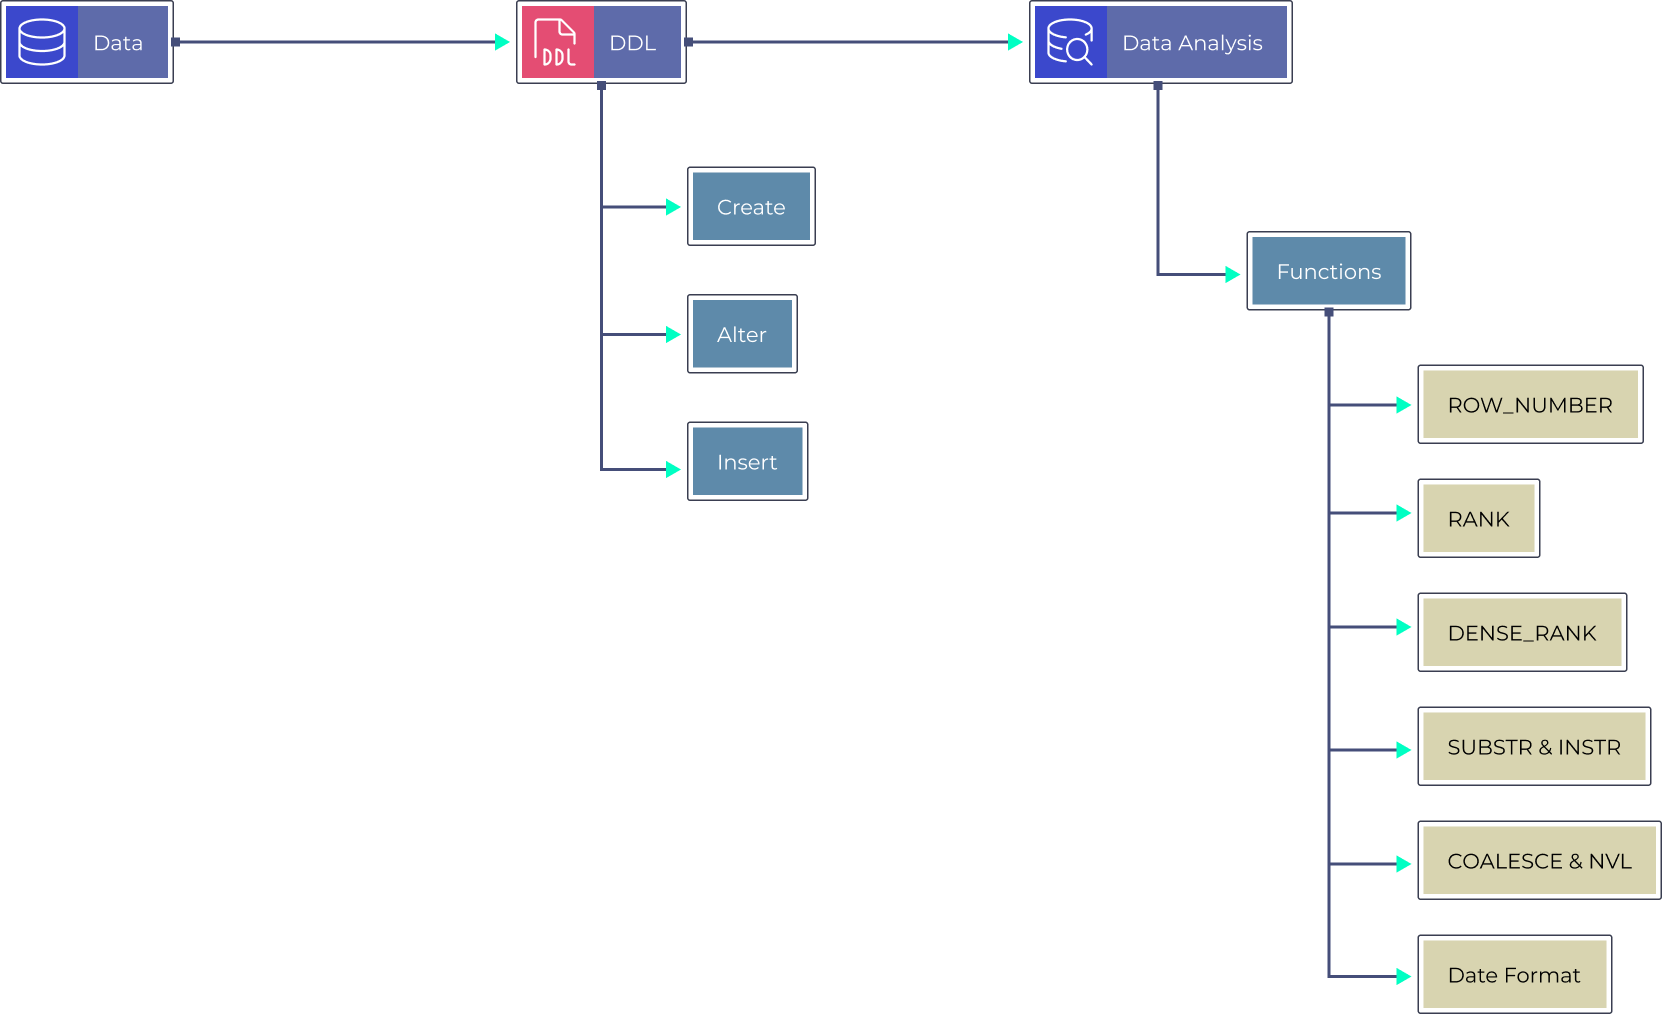

# In this SQL Project for Data Analysis, you will learn to analyse data using various SQL functions like ROW_NUMBER, RANK, DENSE_RANK, SUBSTR, INSTR, COALESCE and NVL.

- Understanding the project and how to use Oracle SQL Developer
- Understanding the basics of data analysis, SQL commands, and their application
- Understanding the use of Oracle SQL Developer
- Understanding the ROW_NUMBER function
- Data analysis using the RANK function
- Difference between RANK and DENSE_RANK functions
- Understanding the use of SUBSTR and INSTR functions
- Data analysis using the built-in functions
- Deal with NULL values using the NVL function
- Understanding the use of COALESCE function
- Change the date format

This project involves data analysis using different SQL functions like ROW_NUMBER, RANK, DENSE_RANK, SUBSTR, INSTR, COALESCE and NVL. It also involves the use of some built-in functions like concat, upper, lower, initcap, rtrim, ltrim, length, lpad, rpad.  

In [ ]:

SELECT * FROM LOCATIONS;
SELECT * FROM DEPARTMENTS;
SELECT * FROM JOBS;
SELECT * FROM EMPLOYEES;
SELECT * FROM JOB_HISTORY;
SELECT * FROM REGIONS;
SELECT * FROM COUNTRIES;
SELECT * FROM NON_FUNCTIONAL_LOCATIONS;

/************************** 1. ROW_NUMBER basics **************************/


--ROW_NUMBER ( )
--    OVER ( [ PARTITION BY col1,col2.. ] order_by_clause col1,col2,col3..)
--    ;

SELECT ROWNUM, T.* FROM EMPLOYEES T;

SELECT ROWNUM,  T.*
FROM
  (SELECT FIRST_NAME,
    LAST_NAME,
    EMAIL,
    PHONE_NUMBER,
    HIRE_DATE,
    JOB_ID,
    SALARY,
    COMMISSION_PCT,
    MANAGER_ID,
    DEPARTMENT_ID
--    PREV_DEPARTMENT_ID
  FROM employees t
  ORDER BY t.HIRE_DATE DESC
  ) T;

SELECT ROW_NUMBER() OVER (ORDER BY HIRE_DATE DESC) RNK
FROM EMPLOYEES;

SELECT ROW_NUMBER() OVER (ORDER BY HIRE_DATE DESC) RNK,
  FIRST_NAME,
  LAST_NAME,
  EMAIL,
  PHONE_NUMBER,
  HIRE_DATE,
  JOB_ID,
  SALARY,
  COMMISSION_PCT,
  MANAGER_ID,
  DEPARTMENT_ID
FROM EMPLOYEES;



In [ ]:

/************************** 2. ROW_NUMBER: Use Case **************************/

SELECT * FROM EMPLOYEES;

--Add a new field to uniquely identify records.
INSERT INTO EMPLOYEES VALUES
   ( 198
   , 'Donald'
   , 'OConnell'
   , 'DOCONNEL'
   , '650.507.9833'
   , TO_DATE('21-JUN-1999', 'dd-MON-yyyy')
   , 'SH_CLERK'
   , 2600
   , NULL
   , 124
   , 50
   );

SELECT EMPLOYEE_ID
FROM EMPLOYEES T;

SELECT EMPLOYEE_ID
  || '.' || ROW_NUMBER() OVER (PARTITION BY T.EMPLOYEE_ID ORDER BY COMMISSION_PCT) EMPLOYEE_PK, T.*
FROM EMPLOYEES T;


--Find duplicate records

SELECT * FROM (
SELECT ROW_NUMBER() OVER (PARTITION BY T.EMPLOYEE_ID ORDER BY COMMISSION_PCT) AS RNK,
  T.*
FROM EMPLOYEES T
)
WHERE RNK = 2;

--REMOVE DUPLICATE RECORDS

SELECT * FROM (
SELECT ROW_NUMBER() OVER (PARTITION BY T.EMPLOYEE_ID ORDER BY COMMISSION_PCT) AS RNK,
  T.*
FROM EMPLOYEES T
)
WHERE RNK = 1;



In [ ]:

/************************** 3. RANK: Department wise details of employees who are getting lowest salary **************************/

/*
ROW_NUMBER and RANK functions are similar.
The output of ROW_NUMBER is a sequence of values starts from 1 with an increment of 1 but whereas the RANK function,
the values are also incremented by 1 but the values will repeat for the ties.
*/

--Department wise details of employees who are getting lowest salary.
SELECT *
  FROM
    (SELECT ROW_NUMBER() OVER (PARTITION BY T.EMPLOYEE_ID ORDER BY COMMISSION_PCT) AS RNK,  T.*
    FROM EMPLOYEES T
    )
  WHERE RNK = 1;





WITH UNIQUE_EMPLOYEES AS
  (SELECT *
  FROM
    (SELECT ROW_NUMBER() OVER (PARTITION BY T.EMPLOYEE_ID ORDER BY COMMISSION_PCT) AS RNK,
      T.*
    FROM EMPLOYEES T
    )
  WHERE RNK = 1
  )
SELECT *
FROM
  (SELECT EMPLOYEE_ID,
    FIRST_NAME,
    LAST_NAME,
    EMAIL,
    PHONE_NUMBER,
    HIRE_DATE,
    JOB_ID,
    SALARY,
    DEPARTMENT_ID,
    ROW_NUMBER () OVER (PARTITION BY DEPARTMENT_ID ORDER BY SALARY) rn,
    RANK() OVER (PARTITION BY DEPARTMENT_ID ORDER BY SALARY) RN_RANK
  FROM UNIQUE_EMPLOYEES
  ) T
WHERE T.RN_RANK = 1;



In [ ]:


/************************** 4. DENSE_RANK: Department wise provide a rank to each employee based on salary **************************/

WITH UNIQUE_EMPLOYEES AS
  (SELECT *
  FROM
    (SELECT ROW_NUMBER() OVER (PARTITION BY T.EMPLOYEE_ID ORDER BY COMMISSION_PCT) AS RNK,
      T.*
    FROM EMPLOYEES T
    )
  WHERE RNK = 1
  )
SELECT *
FROM
  (SELECT EMPLOYEE_ID,
    FIRST_NAME,
    LAST_NAME,
    EMAIL,
    PHONE_NUMBER,
    HIRE_DATE,
    JOB_ID,
    SALARY,
    DEPARTMENT_ID,
    ROW_NUMBER () OVER (PARTITION BY DEPARTMENT_ID ORDER BY SALARY DESC) rn,
    RANK() OVER (PARTITION BY DEPARTMENT_ID ORDER BY SALARY DESC) RN_RANK,
    DENSE_RANK() OVER (PARTITION BY DEPARTMENT_ID ORDER BY SALARY DESC) RN_DENS_RANK
  FROM UNIQUE_EMPLOYEES
  ) T;


In [ ]:

/************************** 5. SUBSTR & INSTR: Fetch last 4 digit of a phone number **************************/

--

/*
SUBSTR functions allows you to extract a substring from a string.

Syntax

SUBSTR( string, start_position [, length ] )
Parameters or Arguments
string: The source string. EX: 515.123.4567

start_position: The starting position for extraction. The first position in the string is always 1. : 9

length: Optional. It is the number of characters to extract. If this parameter is omitted, the SUBSTR function will return the entire string.
*/
SELECT PHONE_NUMBER
FROM EMPLOYEES;

SELECT PHONE_NUMBER, SUBSTR('515.123.4567', 9)
FROM EMPLOYEES;

SELECT PHONE_NUMBER, SUBSTR('515.123.4567', 9,1)
FROM EMPLOYEES;

/*
Syntax

INSTR( string, substring [, start_position [, th_appearance ] ] )

Parameters or Arguments
string: The string to search. string can be CHAR, VARCHAR2, NCHAR, NVARCHAR2, CLOB, or NCLOB.
EX: '515.123.4567'

substring: The substring to search for in string. substring can be CHAR, VARCHAR2, NCHAR, NVARCHAR2, CLOB, or NCLOB.
EX: '.'

start_position: Optional. The position in string where the search will start. If omitted, it defaults to 1. The first position in the string is 1.
If the start_position is negative, the INSTR function counts back start_position number of characters from the end of string and then searches towards the beginning of string.
EX: 1

nth_appearance: Optional. The nth appearance of substring. If omitted, it defaults to 1.
EX: 2
*/

SELECT PHONE_NUMBER, INSTR(PHONE_NUMBER, '.', 1, 1)
FROM EMPLOYEES;


SELECT PHONE_NUMBER, INSTR(PHONE_NUMBER, '.', 1, 2)
FROM EMPLOYEES;

SELECT PHONE_NUMBER,
  SUBSTR(PHONE_NUMBER, INSTR(PHONE_NUMBER, '.', 1, 2)+1) AS LAST_4_DIGIT
FROM EMPLOYEES;




In [ ]:
/************************** 6. Built-In Functions: Show data in a standard format **************************/

SELECT *
FROM EMPLOYEES;

--concat, upper, lower, initcap, rtrim, ltrim, trim, length, lpad, rpad
-- CONCAT

SELECT CONCAT(FIRST_NAME, CONCAT(' ', LAST_NAME)) NAME,
       CONCAT(EMAIL, '@GMAIL.COM') EMAIL
FROM EMPLOYEES;

SELECT UPPER(CONCAT(FIRST_NAME, CONCAT(' ', LAST_NAME))) NAME,
       LOWER(CONCAT(EMAIL, '@GMAIL.COM')) EMAIL,
       INITCAP(CONCAT(EMAIL, '@GMAIL.COM')) INITCAP_EMAIL
FROM EMPLOYEES;

SELECT RTRIM(INITCAP('Rahul DRAVID ')) NAME FROM DUAL;
'Rahul Dravid '
'Rahul Dravid'

SELECT LTRIM(INITCAP('   Rahul DRAVID')) NAME FROM DUAL;
'   Rahul Dravid'
'Rahul Dravid'

SELECT TRIM(INITCAP('   Rahul DRAVID   ')) NAME FROM DUAL;
'   Rahul Dravid   '
'Rahul Dravid'


SELECT DISTINCT COMMISSION_PCT, LENGTH(COMMISSION_PCT), LPAD(COMMISSION_PCT, 5, 0), RPAD(COMMISSION_PCT, 5, 'X')
FROM EMPLOYEES;


In [ ]:

/************************** 7. COALESCE & NVL: Deal with NULL values **************************/

--Calculate commission pct

/*
Commision: SALARY * COMMISSION_PCT
If COMMISSION_PCT is null then commission would be SALARY * .15
*/

--COALESCE: It returns first not null value

SELECT EMPLOYEE_ID, SALARY, COMMISSION_PCT, COALESCE(SALARY * COMMISSION_PCT, SALARY * .15) COMMISSION
FROM EMPLOYEES
ORDER BY COMMISSION_PCT;

--Replace COMMISSION_PCT with 0.15 if it is NULL
--NVL: If first column is null the return 2nd column/expr
SELECT EMPLOYEE_ID, SALARY, COMMISSION_PCT, NVL(COMMISSION_PCT, .15) NEW_COMMISSION_PCT
FROM EMPLOYEES
ORDER BY COMMISSION_PCT;

--Replace COMMISSION_PCT with salary if it is NULL
SELECT EMPLOYEE_ID, SALARY, COMMISSION_PCT, NVL(COMMISSION_PCT, SALARY) NEW_COMMISSION_PCT
FROM EMPLOYEES
ORDER BY COMMISSION_PCT;



In [ ]:

/************************** 8. Date Format: Change the date format **************************/
--21-SEP-89 TO 21/SEP/1989
SELECT FIRST_NAME,
  LAST_NAME,
  EMAIL,
  PHONE_NUMBER,
  HIRE_DATE,
  TO_CHAR(HIRE_DATE, 'DD/MM/YYYY') NEW_DATE_FORMAT
FROM EMPLOYEES;

SELECT FIRST_NAME,
  LAST_NAME,
  EMAIL,
  PHONE_NUMBER,
  HIRE_DATE,
  TO_CHAR(HIRE_DATE, 'DD-MON-YYYY') NEW_DATE_FORMAT
FROM EMPLOYEES;

SELECT FIRST_NAME,
  LAST_NAME,
  EMAIL,
  PHONE_NUMBER,
  HIRE_DATE,
  TO_CHAR(HIRE_DATE, 'YYYY/DD/MM') NEW_DATE_FORMAT
FROM EMPLOYEES;


